In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from keras import layers
import keras

def plot_sample_images(images, size = 100):
    _imgs = images[:size]
    _size = int(np.ceil(np.sqrt(size)))
    for i in range(len(_imgs)):
        axs = plt.subplot(_size, _size, i + 1)
        plt.imshow(_imgs[i])
        plt.axis('off')

In [2]:
train_df = pd.read_csv("./data/input/train.csv")
test_df = pd.read_csv("./data/input/test.csv")

label = 'label'
pixels = train_df.columns.drop(label).tolist()

X = train_df[pixels]
y = train_df[label]

X_reshaped = X.to_numpy().reshape(-1, 28, 28, 1)
X_test_unseen = test_df[pixels].to_numpy().reshape(-1, 28, 28, 1)

## Image Rescaling and Reshaping

In [3]:
resize_and_rescale = keras.Sequential(
    [
        layers.Resizing(24, 24),
        layers.Rescaling(1./255.)
    ]
)

X_resized_and_rescaled = resize_and_rescale(X_reshaped)
X_test_unseen_resized_and_rescaled = resize_and_rescale(X_test_unseen)

### Plotting: Resized and Rescaled Images

Text(0.5, 0.98, 'Before Resizing and Rescaling')

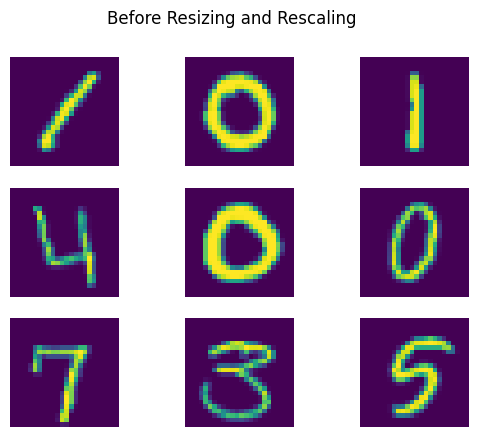

In [4]:
plot_sample_images(X_resized_and_rescaled, 9)
plt.suptitle("Before Resizing and Rescaling")

Text(0.5, 0.98, 'After Resizing and Rescaling')

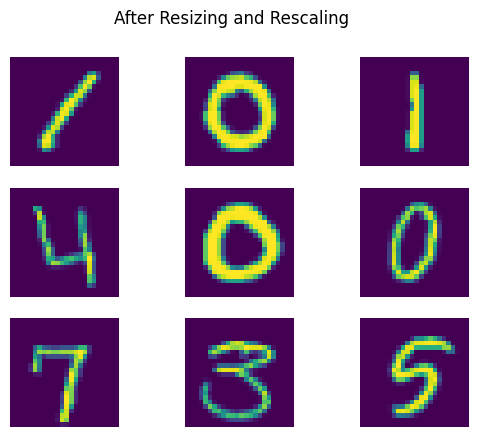

In [5]:
plot_sample_images(X_resized_and_rescaled, 9)
plt.suptitle("After Resizing and Rescaling")

### Saving: Resized and Rescaled Images

In [6]:
from datetime import datetime

now = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save transformed data - train
np.save(f"./data/transformed/train_transformed_{now}_X", arr = X_resized_and_rescaled)
np.save(f"./data/transformed/train_transformed_{now}_y", arr = y.to_numpy())

# Save transformed data - test unseen
np.save(f"./data/transformed/test_unseen_transformed_{now}_X", arr = X_test_unseen_resized_and_rescaled)

## Image Augmentation

In [7]:
rescaler = keras.Sequential([layers.Rescaling(1./255.)])

data_augmenter = keras.Sequential(
    [
        layers.CenterCrop(24, 24),
        layers.RandomFlip(),
        layers.RandomRotation(0.1)
    ]
)

preprocessor = keras.Sequential(
    [
        rescaler,
        data_augmenter
    ]
)

X_augmented = preprocessor(X_reshaped)

### Plotting: Augmented Image

Text(0.5, 0.98, 'Before Augmentation')

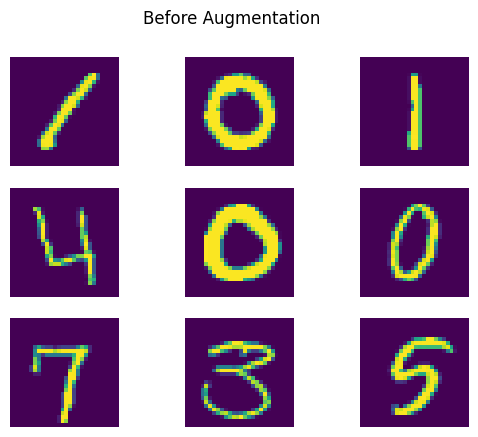

In [8]:
plot_sample_images(X_reshaped, 9)
plt.suptitle("Before Augmentation")

Text(0.5, 0.98, 'After Augmentation')

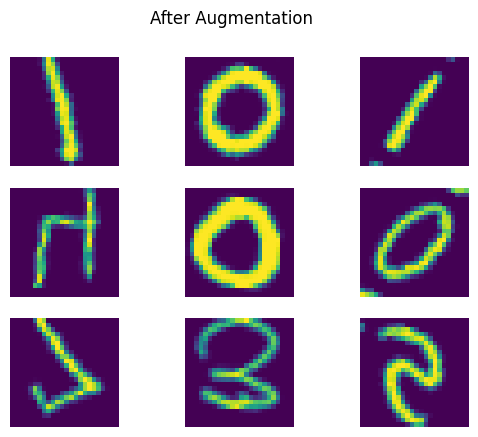

In [9]:
plot_sample_images(X_augmented, 9)
plt.suptitle("After Augmentation")

### Save: Augmented Images

In [10]:
from datetime import datetime

now = datetime.now().strftime("%Y%m%d_%H%M%S")

# Save augmented data
np.save(f"./data/transformed/augmented/augmented_{now}_X", arr = X_augmented)
np.save(f"./data/transformed/augmented/augmented_{now}_y", arr = y.to_numpy())